In [1]:
import os
import sys
import json
import numpy as np

In [2]:
def analyze_ffs_results(json_file):
    from collections import Counter

    # Fix path issues for json_file
    json_file = os.path.normpath(json_file)
    print(f"Using JSON file: {json_file}")

    with open(json_file, "r") as f:
        ffs_results = json.load(f)
    # Extract all selected features from all runs
    all_features = []
    empirical_coverage = []
    all_set_sizes = []
    all_certainties = []    
    for run_data in ffs_results.values():
        # Parse the string representation of the array

        try:
            feature_str = run_data['selected_features']
            features = [int(f) for f in feature_str]

            empirical_coverage.append(run_data['empirical_coverage'])
            set_size = run_data['uncertainty']
            certainty = run_data['certainty']
            all_set_sizes.append(set_size)
            all_certainties.append(certainty)

        except Exception as e:
            features = feature_str.strip().split()

            features = feature_str.replace('[', '').replace(']', '').split()
            feature_str = feature_str.replace('[', '').replace(']', '').split()
            features = [int(f) for f in feature_str]

            empirical_coverage.append(run_data['empirical_coverage'])
            set_size = run_data['uncertainty']
            certainty = run_data['certainty']
            all_set_sizes.append(set_size)
            all_certainties.append(certainty)
        
        all_features.extend(features)

    # Count frequency of each feature
    feature_counts = Counter(all_features)

    # Get top k most frequent features
    k = 10  # You can change this value
    top_k_features = [feature for feature, count in feature_counts.most_common(k)]

    print(f"Top {k} most frequent features:")
    print(top_k_features)
    print("Frequencies:")
    for feature in top_k_features:
        print(f"Feature {feature}: {feature_counts[feature]} times")

    return top_k_features, empirical_coverage, all_set_sizes, all_certainties



json_file_crfe = "../../results/Imvigor_CRFE_Results/crfe_results_imvigor_20.json"
json_file_rfe = "../../results/Imvigor_RFE_Results/rfe_results_imvigor_20.json"
json_file_lasso = "../../results/Imvigor_Lasso_Results/lasso_results_imvigor_20.json"
json_file_enet = "../../results/Imvigor_Enet_Results/enet_results_imvigor_20.json"
json_file_ffs = "../../results/Imvigor_FFS_Results/ffs_results_integrated_DCB6_20.json"


print(os.getcwd())

top_k_features_crfe, empirical_coverage_crfe, all_set_sizes_crfe, all_certainties_crfe = analyze_ffs_results(json_file_crfe)
top_k_features_rfe, empirical_coverage_rfe, all_set_sizes_rfe, all_certainties_rfe = analyze_ffs_results(json_file_rfe)
top_k_features_lasso, empirical_coverage_lasso, all_set_sizes_lasso, all_certainties_lasso = analyze_ffs_results(json_file_lasso)
top_k_features_enet, empirical_coverage_enet, all_set_sizes_enet, all_certainties_enet = analyze_ffs_results(json_file_enet)
top_k_features_ffs, empirical_coverage_ffs, all_set_sizes_ffs, all_certainties_ffs = analyze_ffs_results(json_file_ffs)

print("Top features from CRFE:")
print(top_k_features_crfe)
print( np.mean(empirical_coverage_crfe), np.mean(all_set_sizes_crfe), np.mean(all_certainties_crfe))
print("Top features from RFE:")
print(top_k_features_rfe)
print( np.mean(empirical_coverage_rfe), np.mean(all_set_sizes_rfe), np.mean(all_certainties_rfe))
print("Top features from Lasso:")
print(top_k_features_lasso)
print(np.mean(empirical_coverage_lasso), np.mean(all_set_sizes_lasso), np.mean(all_certainties_lasso))
print("Top features from Elastic Net:")
print(top_k_features_enet)
print(np.mean(empirical_coverage_enet), np.mean(all_set_sizes_enet), np.mean(all_certainties_enet))
print("Top features from FFS:")
print(top_k_features_ffs)
print(np.mean(empirical_coverage_ffs), np.mean(all_set_sizes_ffs), np.mean(all_certainties_ffs))


print("shared features between FFS and CRFE:")
shared_features_ffs_crfe = set(top_k_features_ffs).intersection(set(top_k_features_crfe))
print(shared_features_ffs_crfe)

print("shared features between FFS and RFE:")
shared_features_ffs_rfe = set(top_k_features_ffs).intersection(set(top_k_features_rfe))
print(shared_features_ffs_rfe)

print("shared features between FFS and Lasso:")
shared_features_ffs_lasso = set(top_k_features_ffs).intersection(set(top_k_features_lasso))
print(shared_features_ffs_lasso)    

print("shared features between FFS and Elastic Net:")
shared_features_ffs_enet = set(top_k_features_ffs).intersection(set(top_k_features_enet))
print(shared_features_ffs_enet)


# Compare percentage of shared features for each seed across all methods

# Reload data to get per-seed information
def get_features_per_seed(json_file):
    json_file = os.path.normpath(json_file)
    with open(json_file, "r") as f:
        ffs_results = json.load(f)
    
    features_by_seed = {}
    for seed, run_data in ffs_results.items():
        try:
            feature_str = run_data['selected_features']
            features = [int(f) for f in feature_str]
        except:
            feature_str = run_data['selected_features']
            feature_str = feature_str.replace('[', '').replace(']', '').split()
            features = [int(f) for f in feature_str]
        features_by_seed[seed] = set(features)
    
    return features_by_seed

# Get features per seed for each method
features_crfe = get_features_per_seed(json_file_crfe)
features_rfe = get_features_per_seed(json_file_rfe)
features_lasso = get_features_per_seed(json_file_lasso)
features_enet = get_features_per_seed(json_file_enet)
features_ffs = get_features_per_seed(json_file_ffs)

# Calculate pairwise overlap percentages for each seed
seeds_crfe = list(features_crfe.keys())
seeds_ffs = list(features_ffs.keys())

print("\nPer-seed feature overlap analysis:")
print("="*80)

for seed in seeds_ffs:
    if seed in features_crfe and seed in features_rfe and seed in features_lasso and seed in features_enet:
        ffs_set = features_ffs[seed]
        crfe_set = features_crfe[seed]
        rfe_set = features_rfe[seed]
        lasso_set = features_lasso[seed]
        enet_set = features_enet[seed]
        
        # Calculate overlap percentages
        overlap_crfe = len(ffs_set.intersection(crfe_set)) / len(ffs_set) * 100
        overlap_rfe = len(ffs_set.intersection(rfe_set)) / len(ffs_set) * 100
        overlap_lasso = len(ffs_set.intersection(lasso_set)) / len(ffs_set) * 100
        overlap_enet = len(ffs_set.intersection(enet_set)) / len(ffs_set) * 100
        
        print(f"\nSeed {seed}:")
        print(f"  FFS features: {len(ffs_set)}")
        print(f"  FFS-CRFE overlap: {overlap_crfe:.1f}% ({len(ffs_set.intersection(crfe_set))} features)")
        print(f"  FFS-RFE overlap: {overlap_rfe:.1f}% ({len(ffs_set.intersection(rfe_set))} features)")
        print(f"  FFS-Lasso overlap: {overlap_lasso:.1f}% ({len(ffs_set.intersection(lasso_set))} features)")
        print(f"  FFS-Enet overlap: {overlap_enet:.1f}% ({len(ffs_set.intersection(enet_set))} features)")

# Calculate average overlaps
all_overlaps_crfe = []
all_overlaps_rfe = []
all_overlaps_lasso = []
all_overlaps_enet = []

for seed in seeds_ffs:
    if seed in features_crfe and seed in features_rfe and seed in features_lasso and seed in features_enet:
        ffs_set = features_ffs[seed]
        all_overlaps_crfe.append(len(ffs_set.intersection(features_crfe[seed])) / len(ffs_set) * 100)
        all_overlaps_rfe.append(len(ffs_set.intersection(features_rfe[seed])) / len(ffs_set) * 100)
        all_overlaps_lasso.append(len(ffs_set.intersection(features_lasso[seed])) / len(ffs_set) * 100)
        all_overlaps_enet.append(len(ffs_set.intersection(features_enet[seed])) / len(ffs_set) * 100)

print("\n" + "="*80)
print("Average overlap percentages across all seeds:")
print(f"  FFS-CRFE: {np.mean(all_overlaps_crfe):.1f}% ± {np.std(all_overlaps_crfe):.1f}%")
print(f"  FFS-RFE: {np.mean(all_overlaps_rfe):.1f}% ± {np.std(all_overlaps_rfe):.1f}%")
print(f"  FFS-Lasso: {np.mean(all_overlaps_lasso):.1f}% ± {np.std(all_overlaps_lasso):.1f}%")
print(f"  FFS-Enet: {np.mean(all_overlaps_enet):.1f}% ± {np.std(all_overlaps_enet):.1f}%")


/mnt/storage/mlopezdecas/Conformal Floating/conformal-ffs/workflow/notebooks
Using JSON file: ../../results/Imvigor_CRFE_Results/crfe_results_imvigor_20.json
Top 10 most frequent features:
[927, 1850, 3424, 919, 3425, 332, 924, 1849, 694, 922]
Frequencies:
Feature 927: 3 times
Feature 1850: 3 times
Feature 3424: 3 times
Feature 919: 3 times
Feature 3425: 3 times
Feature 332: 3 times
Feature 924: 2 times
Feature 1849: 2 times
Feature 694: 2 times
Feature 922: 2 times
Using JSON file: ../../results/Imvigor_RFE_Results/rfe_results_imvigor_20.json
Top 10 most frequent features:
[3425, 636, 922, 3424, 924, 2540, 694, 992, 928, 913]
Frequencies:
Feature 3425: 4 times
Feature 636: 4 times
Feature 922: 3 times
Feature 3424: 3 times
Feature 924: 2 times
Feature 2540: 2 times
Feature 694: 2 times
Feature 992: 2 times
Feature 928: 2 times
Feature 913: 2 times
Using JSON file: ../../results/Imvigor_Lasso_Results/lasso_results_imvigor_20.json
Top 10 most frequent features:
[610, 213, 3424, 3447, 21

<>:224: SyntaxWarning: invalid escape sequence '\p'
<>:293: SyntaxWarning: invalid escape sequence '\p'
<>:224: SyntaxWarning: invalid escape sequence '\p'
<>:293: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_2061601/3501938971.py:224: SyntaxWarning: invalid escape sequence '\p'
  label = f"{val:.1f}\n$\pm${std_mat[i, j]:.1f}"
/tmp/ipykernel_2061601/3501938971.py:293: SyntaxWarning: invalid escape sequence '\p'
  label = f"{val:.1f}\n$\pm${std_mat[i, j]:.1f}"


Using JSON file: ../../results/Imvigor_CRFE_Results/crfe_results_imvigor_20.json
Top 10 most frequent features:
[927, 1850, 3424, 919, 3425, 332, 924, 1849, 694, 922]
Using JSON file: ../../results/Imvigor_RFE_Results/rfe_results_imvigor_20.json
Top 10 most frequent features:
[3425, 636, 922, 3424, 924, 2540, 694, 992, 928, 913]
Using JSON file: ../../results/Imvigor_Lasso_Results/lasso_results_imvigor_20.json
Top 10 most frequent features:
[610, 213, 3424, 3447, 211, 30, 636, 917, 3153, 288]
Using JSON file: ../../results/Imvigor_Enet_Results/enet_results_imvigor_20.json
Top 10 most frequent features:
[30, 3153, 610, 1934, 3447, 211, 636, 917, 3230, 3451]
Using JSON file: ../../results/Imvigor_FFS_Results/ffs_results_integrated_DCB6_20.json
Top 10 most frequent features:
[2540, 2723, 591, 729, 1011, 1313, 1451, 2751, 1741, 1289]

Averaged metrics (means):
        CRFE | coverage=0.9116 | uncertainty=1.8317 | certainty=0.0799
         RFE | coverage=0.9031 | uncertainty=1.8219 | certai

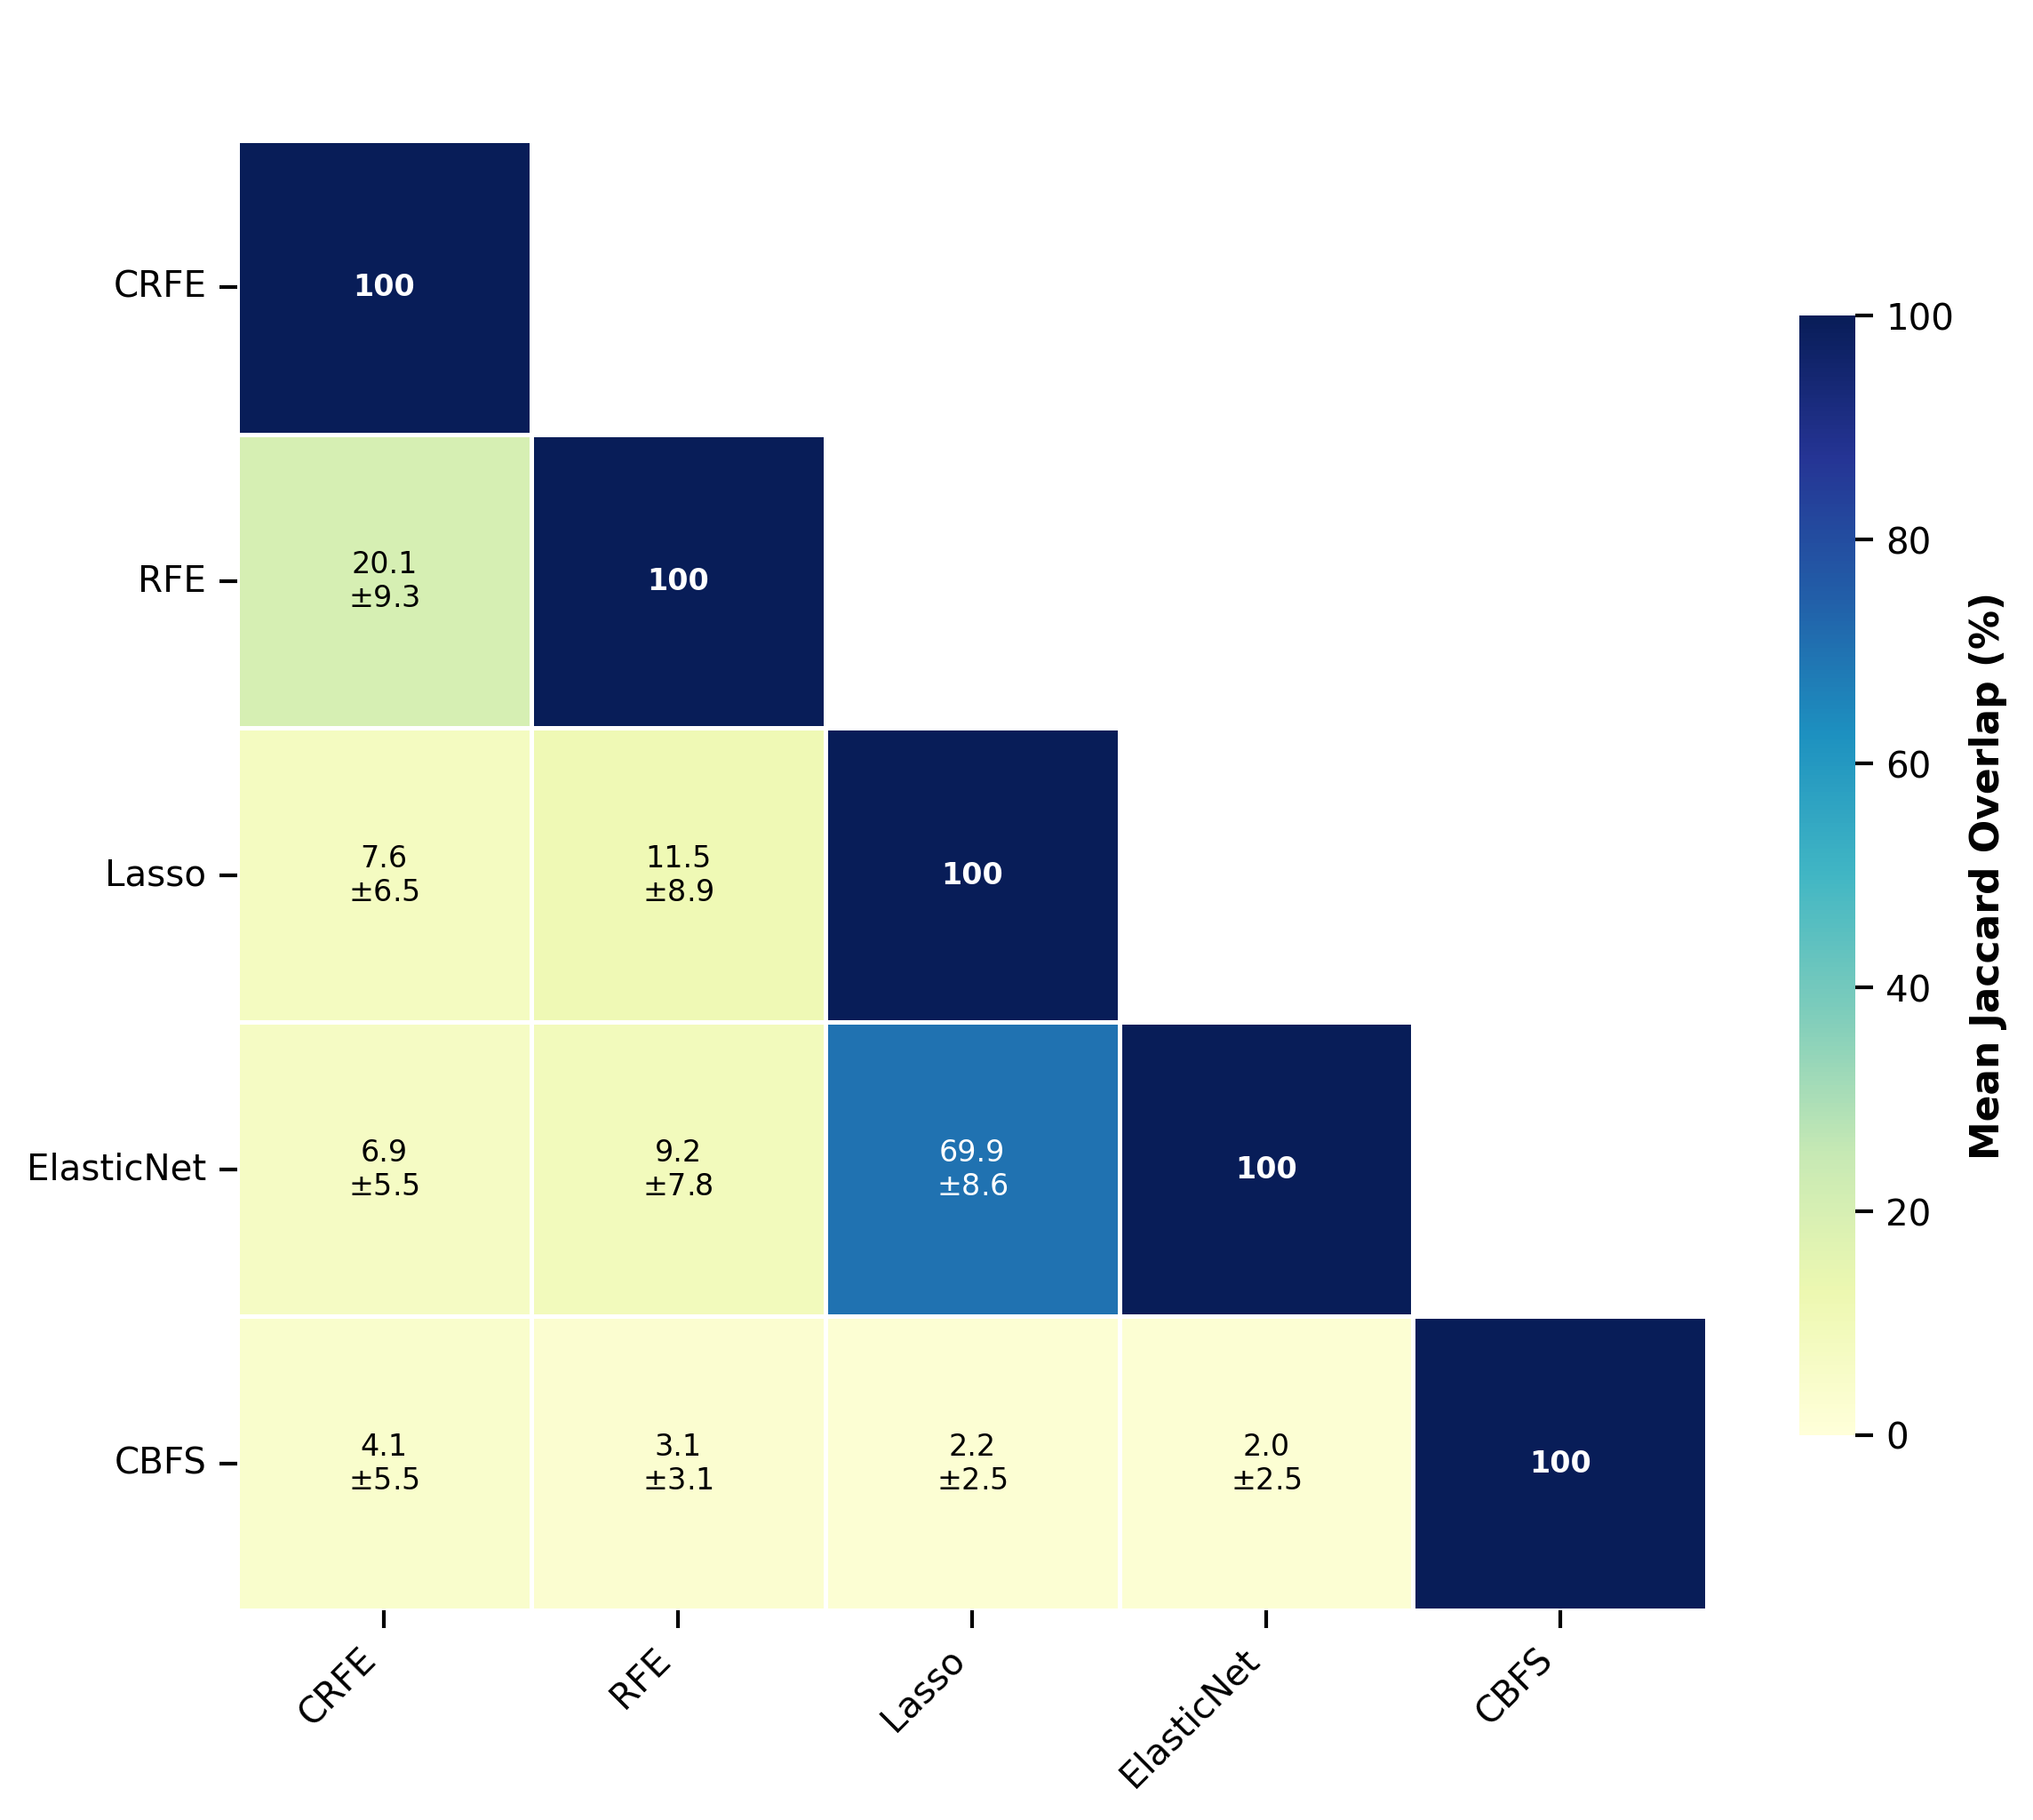

In [17]:
import os, json
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

# ---------------------------
# Robust feature parsing
# ---------------------------
def parse_features(feature_obj):
    """
    Accepts: list[int], list[str], numpy array, or string like "[1 2 3]" / "1 2 3"
    Returns: list[int]
    """
    if feature_obj is None:
        return []

    # Already list/array-like
    if isinstance(feature_obj, (list, tuple, np.ndarray)):
        return [int(x) for x in feature_obj]

    # String cases
    s = str(feature_obj).strip()
    s = s.replace("[", "").replace("]", "").replace(",", " ")
    toks = [t for t in s.split() if t]
    return [int(t) for t in toks]


# ---------------------------
# Top-k + metrics per method
# ---------------------------
def analyze_fs_results(json_file, k=10):
    json_file = os.path.normpath(json_file)
    print(f"Using JSON file: {json_file}")

    with open(json_file, "r") as f:
        results = json.load(f)

    all_features = []
    empirical_coverage = []
    all_set_sizes = []
    all_certainties = []

    for run_data in results.values():
        features = parse_features(run_data.get("selected_features", []))
        all_features.extend(features)

        empirical_coverage.append(run_data.get("empirical_coverage", np.nan))
        all_set_sizes.append(run_data.get("uncertainty", np.nan))  # keeping your naming
        all_certainties.append(run_data.get("certainty", np.nan))

    feature_counts = Counter(all_features)
    top_k_features = [feat for feat, _ in feature_counts.most_common(k)]

    print(f"Top {k} most frequent features:")
    print(top_k_features)

    return top_k_features, empirical_coverage, all_set_sizes, all_certainties


def get_features_per_seed(json_file):
    json_file = os.path.normpath(json_file)
    with open(json_file, "r") as f:
        results = json.load(f)

    features_by_seed = {}
    for seed, run_data in results.items():
        features_by_seed[seed] = set(parse_features(run_data.get("selected_features", [])))
    return features_by_seed


# ---------------------------
# Shared features utilities
# ---------------------------
def shared_topk_across_methods(topk_by_method):
    """
    Returns:
      - shared_all: intersection across ALL methods
      - shared_pairs: dict[(m1,m2)] -> set intersection
    """
    methods = list(topk_by_method.keys())

    shared_all = set.intersection(*(set(topk_by_method[m]) for m in methods))
    shared_pairs = {}
    for m1, m2 in combinations(methods, 2):
        shared_pairs[(m1, m2)] = set(topk_by_method[m1]).intersection(topk_by_method[m2])

    return shared_all, shared_pairs


def jaccard(a, b):
    u = a.union(b)
    return (len(a.intersection(b)) / len(u) * 100.0) if len(u) > 0 else np.nan


def compute_pairwise_seed_overlap(features_by_method):
    """
    Computes per-seed Jaccard overlaps (%) for all method pairs,
    then returns mean/std matrices over common seeds.
    """
    methods = list(features_by_method.keys())
    common_seeds = set.intersection(*(set(features_by_method[m].keys()) for m in methods))

    means = np.full((len(methods), len(methods)), np.nan, dtype=float)
    stds  = np.full((len(methods), len(methods)), np.nan, dtype=float)

    # diagonal
    for i in range(len(methods)):
        means[i, i] = 100.0
        stds[i, i] = 0.0

    for (m1, m2) in combinations(methods, 2):
        vals = []
        for seed in common_seeds:
            A = features_by_method[m1][seed]
            B = features_by_method[m2][seed]
            vals.append(jaccard(A, B))

        mu = np.nanmean(vals)
        sd = np.nanstd(vals)

        i, j = methods.index(m1), methods.index(m2)
        means[i, j] = means[j, i] = mu
        stds[i, j]  = stds[j, i]  = sd

    return methods, common_seeds, means, stds


def plot_overlap_heatmap(methods, mean_mat, std_mat, title=None, dpi=300):
    # light "scientific" defaults
    plt.rcParams.update({
        "font.size": 10,
        "axes.titlesize": 12,
        "axes.labelsize": 11,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
    })

    fig, ax = plt.subplots(figsize=(7.2, 6.2), dpi=dpi)
    im = ax.imshow(mean_mat, vmin=0, vmax=100, aspect="equal")

    ax.set_xticks(range(len(methods)))
    ax.set_yticks(range(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha="right")
    ax.set_yticklabels(methods)

    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Mean Jaccard overlap (%)")

    # annotate mean ± std
    for i in range(len(methods)):
        for j in range(len(methods)):
            if np.isfinite(mean_mat[i, j]):
                if i == j:
                    txt = f"{mean_mat[i, j]:.0f}"
                else:
                    txt = f"{mean_mat[i, j]:.1f}\n±{std_mat[i, j]:.1f}"
                ax.text(j, i, txt, ha="center", va="center", fontsize=8)

    ax.set_xlabel("Method")
    ax.set_ylabel("Method")
    ax.set_title(title or "Feature-set overlap across methods (mean ± SD over seeds)")

    # crisp frame
    ax.set_xlim(-0.5, len(methods) - 0.5)
    ax.set_ylim(len(methods) - 0.5, -0.5)

    fig.tight_layout()
    plt.show()

def plot_overlap_heatmap_q1(methods, mean_mat, std_mat, title=None, dpi=300):
    """
    Optimized for Q1 Journal Publication:
    - Uses Helvetica/Arial-like fonts
    - High-contrast text labeling
    - Professional color palette
    - Tight layout with specific dimensions
    """
    
    # 1. Scientific Styling
    sns.set_context("paper", font_scale=1.1)
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "svg.fonttype": "none",  # Editable text in Illustrator/Inkscape
        "axes.labelweight": "bold",
    })

    # 2. Figure Setup (standard single-column width is ~3.5in, double is ~7in)
    fig, ax = plt.subplots(figsize=(8, 7), dpi=dpi)

    # 3. Choose a professional Colormap (YlGnBu is clean and colorblind friendly)
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    # 4. Create Heatmap
    sns.heatmap(
        mean_mat, 
        annot=False, # We will do custom annotation for better control
        cmap=cmap, 
        vmin=0, vmax=100, 
        square=True, 
        linewidths=.5, 
        cbar_kws={"shrink": .8, "label": "Mean Jaccard Overlap (%)"},
        ax=ax,
        xticklabels=methods,
        yticklabels=methods
    )

    # 5. Dynamic Text Color for Contrast
    # We loop through the matrix to place text manually
    threshold = 60  # If cell > 60%, use white text; else black.
    for i in range(len(methods)):
        for j in range(len(methods)):
            val = mean_mat[i, j]
            if np.isfinite(val):
                # Decide color based on background darkness
                color = "white" if val > threshold else "black"
                
                if i == j:
                    label = f"{val:.0f}"
                    weight = 'bold'
                else:
                    # Use a slightly smaller font for the ± SD to reduce visual noise
                    label = f"{val:.1f}\n$\pm${std_mat[i, j]:.1f}"
                    weight = 'normal'
                
                ax.text(j + 0.5, i + 0.5, label, 
                        ha="center", va="center", 
                        color=color, fontsize=9, fontweight=weight)

    # 6. Refine Axes
    ax.set_xticklabels(methods, rotation=45, ha="right")
    ax.set_yticklabels(methods, rotation=0)
    ax.set_title(title or "Feature-Set Overlap Analysis", pad=20, fontsize=14, fontweight='bold')
    
    # Remove redundant "Method" labels if the names are self-explanatory
    ax.set_xlabel("")
    ax.set_ylabel("")

    plt.tight_layout()
    
    # 7. Recommendation: Save as Vector Format
    # plt.savefig("overlap_matrix.pdf", bbox_inches='tight')
    plt.show()

def plot_diagonal_heatmap_q2(methods, mean_mat, std_mat, title=None, dpi=300):
    # 1. Scientific Styling
    sns.set_context("paper", font_scale=1.1)
    plt.rcParams.update({
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
        "svg.fonttype": "none",
    })

    # 2. Create a mask for the upper triangle
    # k=1 keeps the diagonal; k=0 would mask the diagonal too.
    mask = np.triu(np.ones_like(mean_mat, dtype=bool), k=1)

    # 3. Figure Setup
    fig, ax = plt.subplots(figsize=(8, 7), dpi=dpi)

    # 4. Professional Color Palette
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    # 5. Create Heatmap with Mask
    sns.heatmap(
        mean_mat, 
        mask=mask,           # APPLY THE MASK HERE
        annot=False, 
        cmap=cmap, 
        vmin=0, vmax=100, 
        square=True, 
        linewidths=.8, 
        cbar_kws={"shrink": .7, "label": "Mean Jaccard Overlap (%)"},
        ax=ax,
        xticklabels=methods,
        yticklabels=methods
    )

    # 6. Optimized Annotation Loop
    threshold = 60
    for i in range(len(methods)):
        for j in range(len(methods)):
            # ONLY annotate if it's NOT masked (lower triangle + diagonal)
            if not mask[i, j] and np.isfinite(mean_mat[i, j]):
                val = mean_mat[i, j]
                color = "white" if val > threshold else "black"
                
                if i == j:
                    label = f"{val:.0f}"
                    weight = 'bold'
                else:
                    label = f"{val:.1f}\n$\pm${std_mat[i, j]:.1f}"
                    weight = 'normal'
                
                ax.text(j + 0.5, i + 0.5, label, 
                        ha="center", va="center", 
                        color=color, fontsize=8, fontweight=weight)

    # 7. Refine Axes for Triangular Look
    ax.set_xticklabels(methods, rotation=45, ha="right")
    ax.set_yticklabels(methods, rotation=0)
    
    # Titles and Labels
    ax.set_title(title or "Methodological Overlap Matrix", pad=20, fontsize=14, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Clean up: Remove the empty top-right area ticks
    ax.tick_params(top=False, bottom=True, left=True, right=False)

    plt.tight_layout()

    plt.savefig("overlap_matrix_diagonal.pdf", bbox_inches='tight')
    plt.show()
# ==========================================================
# MAIN
# ==========================================================
json_file_crfe  = "../../results/Imvigor_CRFE_Results/crfe_results_imvigor_20.json"
json_file_rfe   = "../../results/Imvigor_RFE_Results/rfe_results_imvigor_20.json"
json_file_lasso = "../../results/Imvigor_Lasso_Results/lasso_results_imvigor_20.json"
json_file_enet  = "../../results/Imvigor_Enet_Results/enet_results_imvigor_20.json"
json_file_ffs   = "../../results/Imvigor_FFS_Results/ffs_results_integrated_DCB6_20.json"

METHODS = {
    "CRFE": json_file_crfe,
    "RFE": json_file_rfe,
    "Lasso": json_file_lasso,
    "ElasticNet": json_file_enet,
    "CBFS": json_file_ffs,
}

# ---- 1) Top-k + averaged metrics per method
topk_by_method = {}
metrics_by_method = {}

for name, path in METHODS.items():
    topk, cov, sizes, cert = analyze_fs_results(path, k=10)
    topk_by_method[name] = topk
    metrics_by_method[name] = {
        "empirical_coverage_mean": float(np.nanmean(cov)),
        "uncertainty_mean": float(np.nanmean(sizes)),
        "certainty_mean": float(np.nanmean(cert)),
    }

print("\nAveraged metrics (means):")
for m, d in metrics_by_method.items():
    print(f"  {m:>10s} | coverage={d['empirical_coverage_mean']:.4f} "
          f"| uncertainty={d['uncertainty_mean']:.4f} | certainty={d['certainty_mean']:.4f}")

# ---- 2) Shared top-k features (ALL methods + pairwise)
shared_all_topk, shared_pairs_topk = shared_topk_across_methods(topk_by_method)

print("\nShared TOP-K features across ALL methods:")
print(sorted(shared_all_topk))

print("\nShared TOP-K features for each method pair:")
for (m1, m2), s in shared_pairs_topk.items():
    print(f"  {m1:>10s} ∩ {m2:<10s}: {sorted(s)}")

# ---- 3) Per-seed overlap generalized to ALL pairs (Jaccard), then heatmap
features_by_method = {name: get_features_per_seed(path) for name, path in METHODS.items()}
method_order, common_seeds, mean_mat, std_mat = compute_pairwise_seed_overlap(features_by_method)

print(f"\nCommon seeds across ALL methods: {len(common_seeds)}")

# Optional: shared features across ALL methods per seed
shared_counts = []
for seed in common_seeds:
    shared_seed = set.intersection(*(features_by_method[m][seed] for m in method_order))
    shared_counts.append(len(shared_seed))
print(f"Shared features across ALL methods (per-seed): "
      f"{np.mean(shared_counts):.2f} ± {np.std(shared_counts):.2f} features")

# ---- 4) Heatmap (scientific style) with averaged overlap data
import seaborn as sns
plot_diagonal_heatmap_q2(
    method_order,
    mean_mat,
    std_mat,
    title=" "#"Averaged feature overlap across methods (Jaccard %, mean ± SD)"
)


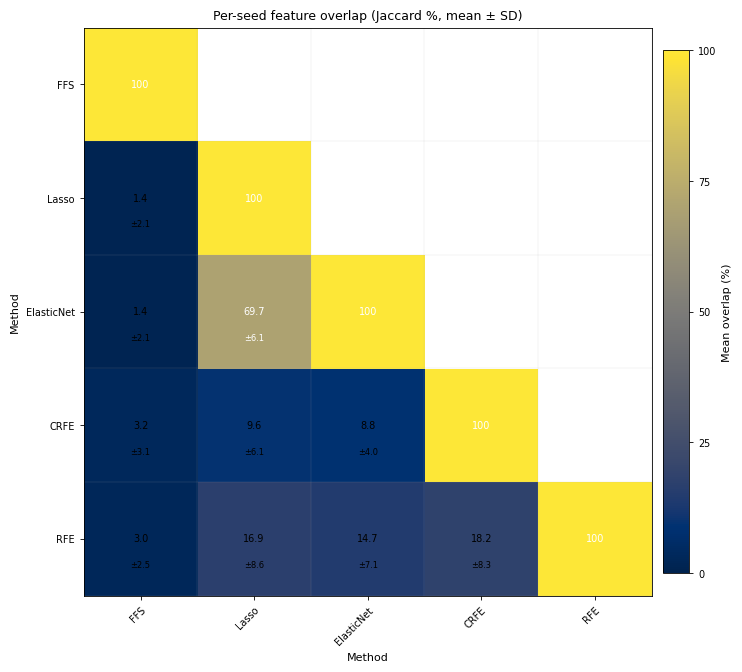

In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_overlap_heatmap_journal(
    methods,
    mean_mat,
    std_mat=None,
    title=None,
    show_std=True,
    triangular="lower",          # "lower", "upper", or None
    cluster=False,               # reorder by hierarchical clustering if SciPy available
    cmap="cividis",              # perceptually uniform + colorblind friendly
    vmin=0, vmax=100,
    single_column=True,          # True ~3.5 in width, False ~7.2 in width
    annotate=True,
    out_prefix="overlap_heatmap" # saves pdf/svg/png with this prefix
):
    methods = list(methods)
    M = np.array(mean_mat, dtype=float)
    S = None if std_mat is None else np.array(std_mat, dtype=float)

    # ---------- Optional clustering (publication-friendly ordering) ----------
    if cluster:
        try:
            from scipy.cluster.hierarchy import linkage, leaves_list
            from scipy.spatial.distance import squareform

            # Use distance = 1 - similarity (scaled to 0..1)
            sim = np.clip(M / 100.0, 0, 1)
            dist = 1 - sim
            np.fill_diagonal(dist, 0.0)

            Z = linkage(squareform(dist, checks=False), method="average")
            order = leaves_list(Z)

            methods = [methods[i] for i in order]
            M = M[np.ix_(order, order)]
            if S is not None:
                S = S[np.ix_(order, order)]
        except Exception:
            # If SciPy isn't available, proceed without clustering
            pass

    # ---------- Journal-ish typography / layout ----------
    mpl.rcParams.update({
        "font.family": "DejaVu Sans",  # widely available; journals accept embedded fonts in PDF
        "font.size": 8,
        "axes.titlesize": 9,
        "axes.labelsize": 8,
        "xtick.labelsize": 7,
        "ytick.labelsize": 7,
        "axes.linewidth": 0.6,
        "xtick.major.width": 0.6,
        "ytick.major.width": 0.6,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "pdf.fonttype": 42,  # embed TrueType fonts
        "ps.fonttype": 42,
    })

    width = 3.5 if single_column else 7.2
    height = width * 0.92
    fig, ax = plt.subplots(figsize=(width, height), constrained_layout=True)

    # ---------- Mask triangle to avoid redundancy ----------
    mask = np.zeros_like(M, dtype=bool)
    if triangular == "lower":
        mask = np.triu(np.ones_like(M, dtype=bool), k=1)
    elif triangular == "upper":
        mask = np.tril(np.ones_like(M, dtype=bool), k=-1)

    M_plot = np.ma.array(M, mask=mask)

    im = ax.imshow(
        M_plot,
        vmin=vmin, vmax=vmax,
        cmap=cmap,
        interpolation="nearest",
        aspect="equal",
    )

    # ---------- Ticks / labels ----------
    ax.set_xticks(range(len(methods)))
    ax.set_yticks(range(len(methods)))
    ax.set_xticklabels(methods, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticklabels(methods)

    # Clean spines
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(0.6)

    # Subtle cell borders via minor ticks (looks crisp in PDF)
    ax.set_xticks(np.arange(-.5, len(methods), 1), minor=True)
    ax.set_yticks(np.arange(-.5, len(methods), 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.3, alpha=0.35)
    ax.tick_params(which="minor", bottom=False, left=False)

    # ---------- Colorbar (compact, journal-style) ----------
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.02)
    cbar.set_label("Mean overlap (%)")
    cbar.set_ticks([0, 25, 50, 75, 100])
    cbar.outline.set_linewidth(0.6)

    # ---------- Annotation (mean and optional ±SD) ----------
    if annotate:
        # choose annotation color based on cell intensity for readability
        mid = (vmin + vmax) / 2.0
        for i in range(len(methods)):
            for j in range(len(methods)):
                if mask[i, j] or not np.isfinite(M[i, j]):
                    continue

                val = M[i, j]
                text_color = "white" if val >= mid else "black"

                if (S is not None) and show_std and (i != j):
                    ax.text(j, i, f"{val:.1f}", ha="center", va="center",
                            color=text_color, fontsize=7)
                    ax.text(j, i + 0.23, f"±{S[i, j]:.1f}", ha="center", va="center",
                            color=text_color, fontsize=6)
                else:
                    ax.text(j, i, f"{val:.1f}" if i != j else f"{val:.0f}",
                            ha="center", va="center", color=text_color, fontsize=7)

    ax.set_xlabel("Method")
    ax.set_ylabel("Method")
    if title:
        ax.set_title(title)

    # ---------- Export: vector first (preferred by journals) ----------
    #fig.savefig(f"{out_prefix}.pdf", bbox_inches="tight")
    #fig.savefig(f"{out_prefix}.svg", bbox_inches="tight")
    #fig.savefig(f"{out_prefix}.png", dpi=600, bbox_inches="tight")  # for quick viewing
    plt.show()


# Example usage:
plot_overlap_heatmap_journal(
     method_order, mean_mat, std_mat,
     title="Per-seed feature overlap (Jaccard %, mean ± SD)",
     triangular="lower",
     cluster=True,           # nice if you want related methods adjacent
     single_column=False,    # set True for single-column figures
     out_prefix="Fig_overlap_heatmap")


In [4]:



import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse
from sklearn.model_selection import StratifiedShuffleSplit
import os 
import pickle
import json
import warnings

import numpy as np
import pandas as pd
import scanpy as sc
from scipy import sparse
from sklearn.model_selection import StratifiedShuffleSplit
import os 
import pickle
import json
import warnings

def _to_dense(X):
    return X.toarray() if sparse.issparse(X) else np.asarray(X)

def _sum_rows(X):
    if sparse.issparse(X):
        return np.asarray(X.sum(axis=1)).ravel()
    return X.sum(axis=1)

def logcpm(X_counts):
    """
    Library-size normalize to CPM then log1p.
    Returns dense float32 (n_samples x n_genes).
    """
    lib = _sum_rows(X_counts).astype(np.float64)
    lib[lib == 0] = np.nan

    if sparse.issparse(X_counts):
        Xcpm = X_counts.multiply(1e6 / lib[:, None])
        Xlog = Xcpm.log1p()
        out = Xlog.toarray().astype(np.float32)
    else:
        Xcpm = (X_counts / lib[:, None]) * 1e6
        out = np.log1p(Xcpm).astype(np.float32)

    out = np.nan_to_num(out, nan=0.0, posinf=0.0, neginf=0.0)
    return out

import numpy as np
import pandas as pd
from scipy import sparse

# assumes you already have these utilities in your codebase:
#   _sum_rows(X)  -> row sums for sparse/dense
#   logcpm(X)     -> library-size normalize to CPM then log1p, returns dense float32


class DCB6Preprocessor:
    """
    Train-only, leakage-safe preprocessing:

      1) Low-expression filter on TRAIN counts:
         keep genes with CPM >= cpm_threshold in >= min_frac_samples of TRAIN samples
      2) Library-size normalization + transform:
         logCPM (log1p(CPM)) applied after train-derived gene mask
      3) Low-variance filter on TRAIN logCPM:
         keep top var_keep_top genes
      4) Batch correction (ComBat) fit on TRAIN, applied to CAL/TEST:
         uses neurocombat-sklearn CombatModel (scikit-learn style, inductive).

    Notes:
      - Requires adata.obs[batch_col] to exist.
      - covariates are optional (e.g., ["AGE","SEX","TMB"] if present).
      - If neurocombat-sklearn is not installed, raises ImportError (no silent leakage fallback).
    """

    def __init__(
        self,
        batch_col="dataset",
        covariates=None,
        cpm_threshold=1.0,
        min_frac_samples=0.05,
        var_keep_top=5000,
        combat_ref_batch=None,   # kept for API compatibility; CombatModel does not use it directly
        dtype=np.float32,
    ):
        self.batch_col = batch_col
        self.covariates = covariates or []
        self.cpm_threshold = float(cpm_threshold)
        self.min_frac_samples = float(min_frac_samples)
        self.var_keep_top = int(var_keep_top) if var_keep_top is not None else None
        self.combat_ref_batch = combat_ref_batch
        self.dtype = dtype

        # learned
        self.var_names_ = None
        self.expr_mask_ = None
        self.var_mask_ = None
        self.feature_names_ = None

        # ComBat model (train-fitted)
        self._combat_model = None

    def _low_expr_mask(self, X_train_counts):
        lib = _sum_rows(X_train_counts).astype(np.float64)
        lib[lib == 0] = np.nan

        if sparse.issparse(X_train_counts):
            Xcpm = X_train_counts.multiply(1e6 / lib[:, None])
            frac = (Xcpm >= self.cpm_threshold).mean(axis=0)
            frac = np.asarray(frac).ravel()
        else:
            Xcpm = (X_train_counts / lib[:, None]) * 1e6
            frac = (Xcpm >= self.cpm_threshold).mean(axis=0)

        return frac >= self.min_frac_samples

    def _build_batch_and_cov(self, adata):
        if self.batch_col not in adata.obs.columns:
            raise KeyError(f"batch_col='{self.batch_col}' not found in adata.obs")

        batch_df = pd.DataFrame(
            {"batch": adata.obs[self.batch_col].astype(str).values},
            index=adata.obs_names,
        )

        cov_dfs = []
        for c in self.covariates:
            if c not in adata.obs.columns:
                raise KeyError(f"covariate '{c}' not found in adata.obs")
            cov_dfs.append(pd.DataFrame({c: adata.obs[c].values}, index=adata.obs_names))

        return batch_df, cov_dfs

    def fit(self, adata_train):
        # --- basic checks ---
        if adata_train.n_obs < 2:
            raise ValueError("Need at least 2 samples to fit DCB6Preprocessor.")
        if adata_train.n_vars < 2:
            raise ValueError("Need at least 2 genes to fit DCB6Preprocessor.")

        Xtr_counts = adata_train.X
        self.var_names_ = adata_train.var_names.astype(str)

        # 1) expression mask (TRAIN only)
        self.expr_mask_ = self._low_expr_mask(Xtr_counts)

        if self.expr_mask_.sum() < 10:
            raise ValueError(f"Too few genes pass low-expression filter: {self.expr_mask_.sum()}")

        # 2) logCPM (TRAIN only, after expr filter)
        Xtr_log = logcpm(Xtr_counts[:, self.expr_mask_])  # dense

        # 3) variance mask (TRAIN only)
        v = Xtr_log.var(axis=0, ddof=1)
        if self.var_keep_top is not None and self.var_keep_top < Xtr_log.shape[1]:
            top = np.argsort(v)[::-1][: self.var_keep_top]
            var_mask = np.zeros(Xtr_log.shape[1], dtype=bool)
            var_mask[top] = True
        else:
            var_mask = np.ones(Xtr_log.shape[1], dtype=bool)

        self.var_mask_ = var_mask

        genes_expr = self.var_names_[self.expr_mask_]
        self.feature_names_ = genes_expr[self.var_mask_]

        # 4) Fit ComBat on TRAIN only
        Xtr_sel = Xtr_log[:, self.var_mask_]  # (n_train, n_selected_genes)

        try:
            from neurocombat_sklearn import CombatModel
        except ImportError as e:
            raise ImportError(
                "neurocombat-sklearn is required for inductive (train-only) ComBat.\n"
                "Install with: pip install neurocombat-sklearn"
            ) from e

        #batch_tr, cov_tr_list = self._build_batch_and_cov(adata_train)

        batch_cat = pd.Categorical(adata_train.obs[self.batch_col].astype(str))
        self._batch_categories_ = list(batch_cat.categories)
        sites_tr = batch_cat.codes.reshape(-1, 1).astype(np.float64)

        # covariates -> numeric arrays (minimal handling)
        cov_tr_list = []
        for c in self.covariates:
            v = pd.to_numeric(adata_train.obs[c], errors="coerce")
            if v.isna().any():
                # if non-numeric, you need to encode it; smallest solution = factor codes
                v = pd.Categorical(adata_train.obs[c].astype(str)).codes.astype(np.float64)
            else:
                v = v.astype(np.float64).values
            cov_tr_list.append(v.reshape(-1, 1))

        self._combat_model = CombatModel()
        _ = self._combat_model.fit_transform(Xtr_sel, sites_tr, *cov_tr_list)
            #self._combat_model = CombatModel()
            #_ = self._combat_model.fit_transform(Xtr_sel, batch_tr, *cov_tr_list)

        return self

    def transform(self, adata):
        if self.expr_mask_ is None or self.var_mask_ is None or self._combat_model is None:
            raise RuntimeError("Call fit() first.")

        # apply train-learned gene masks, then logCPM
        X_counts = adata.X
        X_log = logcpm(X_counts[:, self.expr_mask_])
        X_sel = X_log[:, self.var_mask_]

        batch_cat = pd.Categorical(
            adata.obs[self.batch_col].astype(str),
            categories=self._batch_categories_
        )
        sites = batch_cat.codes.reshape(-1, 1).astype(np.float64)

        # If any unseen batch label appears, fail fast (simplest safe behavior)
        if (batch_cat.codes == -1).any():
            unseen = pd.unique(adata.obs[self.batch_col].astype(str)[batch_cat.codes == -1])
            raise ValueError(f"Unseen batch labels at transform(): {unseen}. "
                            f"Ensure every dataset appears in TRAIN or disable ComBat for LOSO.")

        # Covariates: must be numeric arrays too (minimal handling; matches your fit() approach)
        cov_list = []
        for c in self.covariates:
            v = pd.to_numeric(adata.obs[c], errors="coerce")
            if v.isna().any():
                v = pd.Categorical(adata.obs[c].astype(str)).codes.astype(np.float64)
            else:
                v = v.astype(np.float64).values
            cov_list.append(v.reshape(-1, 1))

        X_h = self._combat_model.transform(X_sel, sites, *cov_list)
        return np.asarray(X_h, dtype=self.dtype)

    def get_feature_names(self):
        return self.feature_names_



class h5adDataReader:
    """
    Loads an .h5ad dataset and returns (X_train, X_cal, X_test, y_train, y_cal, y_test), class_names

    Assumptions:
      - target_column is either already present in adata.obs (e.g., "DCB6"),
        OR you pass a special target_column value to create it:
          target_column="__DCB6__"  (will create from time/event columns you provide)

    Supports:
      - train-only preprocessing: gene filtering + logCPM + ComBat (fit on train only)
      - stratified splits: train / calibration / test

    If you already saved an integrated h5ad with obs["DCB6"], set target_column="DCB6"
    and you DON'T need to provide time/event columns.
    """

    def __init__(
        self,
        # splitting
        test_size=0.20,
        cal_size=0.40,
        random_state=0,

        # preprocessing
        use_raw=False,                 # if True and adata.raw exists, will use adata.raw.X and adata.raw.var_names
        batch_col="dataset",
        covariates=None,               # optional obs columns for ComBat model
        cpm_threshold=1.0,
        min_frac_samples=0.05,
        var_keep_top=6000,
        combat_ref_batch=None):


        self.test_size = float(test_size)
        self.cal_size = float(cal_size)
        self.random_state = int(random_state)

        self.use_raw = bool(use_raw)
        self.batch_col = batch_col
        self.covariates = covariates or []
        self.cpm_threshold = cpm_threshold
        self.min_frac_samples = min_frac_samples
        self.var_keep_top = var_keep_top
        self.combat_ref_batch = combat_ref_batch


        # will be set after load
        self.adata = None
        self.feature_names_ = None
        self.preprocessor_ = None

    def _ensure_target(self, adata, target_column):
        # If target exists, use it
        if target_column in adata.obs.columns:
            y = adata.obs[target_column]
            return y
        raise KeyError(f"target_column='{target_column}' not found in adata.obs, and no rule to create it.")

    def _get_matrix_view(self, adata):
        if self.use_raw and (adata.raw is not None):
            X = adata.raw.X
            var_names = adata.raw.var_names.astype(str)
        else:
            X = adata.X
            var_names = adata.var_names.astype(str)
        return X, var_names

    def load_data(self, data_path, target_column):
        # read
        adata = sc.read_h5ad(data_path)

        # ensure target column
        y = self._ensure_target(adata, target_column)

        # drop missing labels
        y_num = pd.to_numeric(pd.Series(y), errors="coerce")
        keep = y_num.notna()
        adata = adata[keep.values].copy()
        y_num = y_num.loc[keep].astype(int).values

        print(f"Data shape after dropping missing labels: {adata.shape}")

        # Ensure batch_col exists if you plan ComBat
        if self.batch_col not in adata.obs.columns:
            warnings.warn(f"Batch column '{self.batch_col}' not found in adata.obs. Creating single-batch label to avoid errors.")
            # If missing, create a single-batch label so preprocessing still works
            adata.obs[self.batch_col] = "batch0"

        # If using raw, mirror var/ X into .X so downstream slicing is consistent
        X, var_names = self._get_matrix_view(adata)
        if (self.use_raw and (adata.raw is not None)):
            # rebuild a lightweight AnnData with raw X/var but same obs
            import anndata as ad
            adata = ad.AnnData(X=X, obs=adata.obs.copy(), var=pd.DataFrame(index=var_names))
        else:
            # ensure var_names match what we use
            adata.var_names = var_names

        # class names
        class_names = sorted(list(pd.unique(y_num)))

        # split: train vs temp, then temp -> cal/test
        temp_size = self.test_size + self.cal_size
        if temp_size >= 1.0:
            raise ValueError("test_size + cal_size must be < 1.0")

        splitter1 = StratifiedShuffleSplit(
            n_splits=1, test_size=temp_size, random_state=self.random_state
        )
        train_idx, temp_idx = next(splitter1.split(np.zeros(len(y_num)), y_num))

        y_temp = y_num[temp_idx]
        # relative size of test within temp
        test_frac_within_temp = self.test_size / temp_size

        splitter2 = StratifiedShuffleSplit(
            n_splits=1, test_size=test_frac_within_temp, random_state=self.random_state + 1
        )
        cal_rel_idx, test_rel_idx = next(splitter2.split(np.zeros(len(y_temp)), y_temp))
        cal_idx = temp_idx[cal_rel_idx]
        test_idx = temp_idx[test_rel_idx]

        # train-only preprocessing (filter + logCPM + ComBat)
        self.preprocessor_ = DCB6Preprocessor(
            batch_col=self.batch_col,
            covariates=self.covariates,
            cpm_threshold=self.cpm_threshold,
            min_frac_samples=self.min_frac_samples,
            var_keep_top=self.var_keep_top,
            combat_ref_batch=self.combat_ref_batch,
        )

        ad_train = adata[train_idx].copy()
        ad_cal   = adata[cal_idx].copy()
        ad_test  = adata[test_idx].copy()

        self.preprocessor_.fit(ad_train)
        X_train = self.preprocessor_.transform(ad_train)
        X_cal   = self.preprocessor_.transform(ad_cal)
        X_test  = self.preprocessor_.transform(ad_test)

        self.feature_names_ = self.preprocessor_.get_feature_names()

        y_train = y_num[train_idx]
        y_cal   = y_num[cal_idx]
        y_test  = y_num[test_idx]

        splits = (X_train, X_cal, X_test, y_train, y_cal, y_test)

        self.adata  = adata#[:, self.preprocessor_.var_mask_]  # keep full adata if needed later

        return splits, class_names




data_path = data_path = "../../data/imvigor/integrated_DCB6.h5ad"
target_column =  "DCB6" #"target" #"recist"  # Specify the target column for real datasets
data_reader = h5adDataReader(test_size=0.20,cal_size=0.30, random_state=1, var_keep_top=3500)
(splits, class_names) = data_reader.load_data(data_path, target_column)
adata = data_reader.adata

Data shape after dropping missing labels: (969, 60649)


In [5]:
data_path = data_path = "../../data/imvigor/integrated_DCB6.h5ad"
target_column =  "DCB6" #"target" #"recist"  # Specify the target column for real datasets
data_reader = h5adDataReader(test_size=0.20,cal_size=0.30, random_state=1, var_keep_top=3500)
(splits, class_names) = data_reader.load_data(data_path, target_column)
adata = data_reader.adata

from scipy.stats import mannwhitneyu, ttest_ind
import pandas as pd

# Get the feature names from the preprocessor
feature_names = data_reader.preprocessor_.feature_names_

# Filter adata to only include these genes
adata_filtered = adata[:, feature_names].copy()

print(f"Original adata shape: {adata.shape}")
print(f"Filtered adata shape: {adata_filtered.shape}")

possitions = top_k_features_ffs

def get_genes_at_positions(feature_names, positions):
    return [feature_names[i] for i in positions]

def create_adata_with_genes(adata, gene_list):
    return adata[:, gene_list].copy()
# Get genes at specified positions from feature_names
selected_genes = get_genes_at_positions(feature_names, possitions)
print(f"Selected genes at positions {possitions}: {selected_genes}")

# Create new adata with only these genes
adata_positions = create_adata_with_genes(adata_filtered, selected_genes)

print(f"adata_positions shape: {adata_positions.shape}")

# Perform statistical test for each gene

# Get the DCB6 labels
dcb6_labels = adata_positions.obs['DCB6'].values

# Get the expression matrix
X_expr = adata_positions.X
if hasattr(X_expr, 'toarray'):
    X_expr = X_expr.toarray()

X_expr = logcpm(X_expr)

# Store results
test_results = []

for i, gene in enumerate(selected_genes):
    gene_expr = X_expr[:, i]
    
    # Split by DCB6 status
    group_0 = gene_expr[dcb6_labels == 0]
    group_1 = gene_expr[dcb6_labels == 1]
    
    # Perform Mann-Whitney U test (non-parametric)
    statistic, pvalue = mannwhitneyu(group_0, group_1, alternative='two-sided')
    
    # Also compute t-test for comparison
    t_stat, t_pvalue = ttest_ind(group_0, group_1)
    
    test_results.append({
        'gene': gene,
        'position': possitions[i],
        'mann_whitney_statistic': statistic,
        'mann_whitney_pvalue': pvalue,
        'ttest_statistic': t_stat,
        'ttest_pvalue': t_pvalue,
        'mean_group_0': np.mean(group_0),
        'mean_group_1': np.mean(group_1),
        'median_group_0': np.median(group_0),
        'median_group_1': np.median(group_1)
    })

# Create DataFrame with results
results_df = pd.DataFrame(test_results)
print("\nStatistical test results:")
print(results_df.to_string(index=False))

Data shape after dropping missing labels: (969, 60649)
Original adata shape: (969, 60649)
Filtered adata shape: (969, 3500)
Selected genes at positions [2540, 2723, 591, 729, 1011, 1313, 1451, 2751, 1741, 1289]: ['ENSG00000058335.16', 'ENSG00000109063.15', 'ENSG00000144339.12', 'ENSG00000198643.7', 'ENSG00000164107.9', 'ENSG00000135318.12', 'ENSG00000153993.14', 'ENSG00000271447.6', 'ENSG00000165140.12', 'ENSG00000096006.12']
adata_positions shape: (969, 10)

Statistical test results:
              gene  position  mann_whitney_statistic  mann_whitney_pvalue  ttest_statistic  ttest_pvalue  mean_group_0  mean_group_1  median_group_0  median_group_1
ENSG00000058335.16      2540                110075.5             0.983729         0.630644  5.284225e-01      9.609938      9.556038        9.568610        9.590589
ENSG00000109063.15      2723                 90538.0             0.000004        -4.946362  8.913314e-07     11.860338     12.109895       11.996665       12.192909
ENSG00000144339

In [6]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu, ttest_ind
from statsmodels.stats.multitest import multipletests

def univariate_group_tests(X_expr_df, dcb6_labels, selected_genes, positions=None):
    """
    X_expr_df: pandas DataFrame (n_samples x n_genes), log-normalized
    dcb6_labels: array-like of 0/1, length n_samples
    selected_genes: list of gene names (must be columns in X_expr_df)
    positions: optional list/array same length as selected_genes
    """
    y = np.asarray(dcb6_labels).astype(int)
    out = []

    for idx, gene in enumerate(selected_genes):
        if gene not in X_expr_df.columns:
            continue

        gene_expr = X_expr_df[gene].to_numpy()

        group_0 = gene_expr[y == 0]
        group_1 = gene_expr[y == 1]

        # Drop NaNs if any
        group_0 = group_0[np.isfinite(group_0)]
        group_1 = group_1[np.isfinite(group_1)]

        # Mann–Whitney (two-sided)
        mw_stat, mw_p = mannwhitneyu(group_0, group_1, alternative="two-sided")

        # Welch t-test (recommended default)
        t_stat, t_p = ttest_ind(group_0, group_1, equal_var=False)

        out.append({
            "gene": gene,
            "position": None if positions is None else positions[idx],
            "n0": len(group_0),
            "n1": len(group_1),
            "mean_0": float(np.mean(group_0)),
            "mean_1": float(np.mean(group_1)),
            "median_0": float(np.median(group_0)),
            "median_1": float(np.median(group_1)),
            "delta_mean": float(np.mean(group_1) - np.mean(group_0)),
            "mannwhitney_stat": float(mw_stat),
            "mannwhitney_p": float(mw_p),
            "welch_t_stat": float(t_stat),
            "welch_t_p": float(t_p),
        })

    res = pd.DataFrame(out)

    # FDR correction (BH)
    for pcol in ["mannwhitney_p", "welch_t_p"]:
        pvals = res[pcol].to_numpy()
        qvals = np.full_like(pvals, np.nan, dtype=float)
        mask = np.isfinite(pvals)
        if mask.sum() > 0:
            qvals[mask] = multipletests(pvals[mask], method="fdr_bh")[1]
        res[pcol.replace("_p", "_qfdr")] = qvals

    return res.sort_values("welch_t_qfdr", na_position="last")





In [34]:
logcpm(adata.X)

array([[0.        , 1.4365052 , 0.        , ..., 2.9311147 , 0.        ,
        0.12416705],
       [0.        , 1.9665035 , 0.        , ..., 2.7187731 , 0.        ,
        0.15443747],
       [0.        , 2.332358  , 0.        , ..., 2.3915782 , 0.        ,
        0.06095654],
       ...,
       [0.        , 1.2905148 , 0.        , ..., 1.605683  , 0.        ,
        0.        ],
       [0.07965091, 1.588566  , 0.        , ..., 4.8367133 , 0.19974437,
        1.2570126 ],
       [0.17407466, 2.0312178 , 0.        , ..., 1.6080436 , 0.        ,
        0.03119895]], shape=(969, 60649), dtype=float32)

In [8]:
import os
import numpy as np
import pandas as pd

from scipy.stats import mannwhitneyu, ttest_ind, chi2
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests


# -----------------------------
# Helpers
# -----------------------------
def is_likely_counts(X, sample_size=2000, atol=1e-6):
    """
    Heuristic: if values are (almost) integers and non-negative, it's likely counts.
    Works with dense numpy arrays.
    """
    x = X.ravel()
    if x.size > sample_size:
        idx = np.random.choice(x.size, size=sample_size, replace=False)
        x = x[idx]
    x = x[np.isfinite(x)]
    if x.size == 0:
        return False
    if np.nanmin(x) < 0:
        return False
    return np.allclose(x, np.round(x), atol=atol)


def logcpm(counts, prior_count=1.0):
    """
    log-CPM normalization:
      CPM = counts / library_size * 1e6
      logCPM = log(CPM + prior_count)
    """
    counts = np.asarray(counts, dtype=float)
    libsize = counts.sum(axis=1, keepdims=True)
    libsize[libsize == 0] = np.nan
    cpm = counts / libsize * 1e6
    return np.log(cpm + prior_count)


def bh_fdr(pvals):
    pvals = np.asarray(pvals, dtype=float)
    q = np.full_like(pvals, np.nan)
    mask = np.isfinite(pvals)
    if mask.sum() > 0:
        q[mask] = multipletests(pvals[mask], method="fdr_bh")[1]
    return q


def logistic_lrt_pvalue(y, x):
    """
    Univariate logistic regression LRT:
      null: y ~ 1
      full: y ~ 1 + x
    Returns: OR (per 1 SD of x), CI95, p_LRT
    """
    y = np.asarray(y).astype(int)
    x = np.asarray(x).astype(float)

    m = np.isfinite(y) & np.isfinite(x)
    y = y[m]
    x = x[m]

    # Need both classes
    if np.unique(y).size < 2 or y.size < 20:
        return np.nan, np.nan, np.nan, np.nan

    # Standardize predictor => OR per 1 SD
    xs = (x - np.mean(x)) / (np.std(x, ddof=0) + 1e-12)

    try:
        X0 = sm.add_constant(np.zeros_like(xs), has_constant="add")  # intercept-only
        m0 = sm.Logit(y, X0).fit(disp=0)

        X1 = sm.add_constant(xs, has_constant="add")
        m1 = sm.Logit(y, X1).fit(disp=0)

        lr_stat = 2.0 * (m1.llf - m0.llf)
        p_lrt = chi2.sf(lr_stat, df=1)

        beta = m1.params[1]     # coefficient for xs
        se = m1.bse[1]
        OR = float(np.exp(beta))
        ci_low = float(np.exp(beta - 1.96 * se))
        ci_high = float(np.exp(beta + 1.96 * se))
        return OR, ci_low, ci_high, p_lrt

    except Exception:
        # common failures: perfect separation, convergence
        return np.nan, np.nan, np.nan, np.nan


# -----------------------------
# Load + subset data
# -----------------------------
data_path = "../../data/imvigor/integrated_DCB6.h5ad"
target_column = "DCB6"

data_reader = h5adDataReader(test_size=0.20, cal_size=0.30, random_state=1, var_keep_top=3500)
(splits, class_names) = data_reader.load_data(data_path, target_column)
adata = data_reader.adata

# Feature names kept by your preprocessor
feature_names = np.array(data_reader.preprocessor_.feature_names_)

# Filter adata to those genes/features
adata_filtered = adata[:, feature_names].copy()
print(f"Original adata shape: {adata.shape}")
print(f"Filtered adata shape: {adata_filtered.shape}")

# Positions of selected features (e.g., top_k_features_ffs from your FS step)
positions = top_k_features_ffs  # list[int] of indices into feature_names

selected_genes = [feature_names[i] for i in positions]
print(f"Selected genes at positions {positions}:\n{selected_genes}")

adata_sel = adata_filtered[:, selected_genes].copy()
print(f"adata_sel shape: {adata_sel.shape}")


# -----------------------------
# Prepare y and X
# -----------------------------
y = adata_sel.obs[target_column].to_numpy().astype(int)

X = adata_sel.X
if hasattr(X, "toarray"):  # sparse -> dense
    X = X.toarray()
X = np.asarray(X)

# If raw counts, do logCPM; if already normalized/log-transformed, keep as is.
# You can force behavior by setting force_transform = True/False.
force_transform = None  # None="auto", True=always logCPM, False=never
if force_transform is None:
    do_logcpm = is_likely_counts(X)
else:
    do_logcpm = bool(force_transform)

if do_logcpm:
    X_used = logcpm(X, prior_count=1.0)
    print("Detected count-like data -> using logCPM transform for group tests + logistic.")
else:
    X_used = X
    print("Data does not look like raw counts -> using X as provided (assumed already normalized/log).")


# -----------------------------
# Univariate tests per gene
# -----------------------------
rows = []
for j, gene in enumerate(selected_genes):
    gene_expr = X_used[:, j]

    g0 = gene_expr[y == 0]
    g1 = gene_expr[y == 1]

    # Safety: drop NaNs/Infs
    g0 = g0[np.isfinite(g0)]
    g1 = g1[np.isfinite(g1)]

    # Mann–Whitney (distribution shift)
    mw_stat, mw_p = mannwhitneyu(g0, g1, alternative="two-sided")

    # Welch t-test (difference in means; better default than equal_var=True)
    t_stat, t_p = ttest_ind(g0, g1, equal_var=False, nan_policy="omit")

    # Logistic LRT (directly models P(DCB6=1) ~ gene)
    OR, OR_lo, OR_hi, p_lrt = logistic_lrt_pvalue(y, gene_expr)

    rows.append({
        "gene": gene,
        "position": int(positions[j]),
        "n0": int(g0.size),
        "n1": int(g1.size),
        "mean_0": float(np.mean(g0)) if g0.size else np.nan,
        "mean_1": float(np.mean(g1)) if g1.size else np.nan,
        "median_0": float(np.median(g0)) if g0.size else np.nan,
        "median_1": float(np.median(g1)) if g1.size else np.nan,
        "delta_mean": float(np.mean(g1) - np.mean(g0)) if (g0.size and g1.size) else np.nan,
        "mw_stat": float(mw_stat),
        "mw_p": float(mw_p),
        "welch_t_stat": float(t_stat),
        "welch_t_p": float(t_p),
        "logit_OR_perSD": OR,
        "logit_OR_CI_low": OR_lo,
        "logit_OR_CI_high": OR_hi,
        "logit_LRT_p": p_lrt,
    })

results_df = pd.DataFrame(rows)

# FDR correction (BH) for each family of tests
results_df["mw_qfdr"] = bh_fdr(results_df["mw_p"].values)
results_df["welch_t_qfdr"] = bh_fdr(results_df["welch_t_p"].values)
results_df["logit_LRT_qfdr"] = bh_fdr(results_df["logit_LRT_p"].values)

# Sort by the most “direct” test for binary outcome
results_df = results_df.sort_values(["logit_LRT_qfdr", "logit_LRT_p"], na_position="last").reset_index(drop=True)

print("\nUnivariate results (sorted by logistic LRT FDR):")
print(results_df.to_string(index=False))

# Optionally save
# results_df.to_csv("univariate_gene_tests_DCB6.csv", index=False)


Data shape after dropping missing labels: (969, 60649)
Original adata shape: (969, 60649)
Filtered adata shape: (969, 3500)
Selected genes at positions [2540, 2723, 591, 729, 1011, 1313, 1451, 2751, 1741, 1289]:
['ENSG00000058335.16', 'ENSG00000109063.15', 'ENSG00000144339.12', 'ENSG00000198643.7', 'ENSG00000164107.9', 'ENSG00000135318.12', 'ENSG00000153993.14', 'ENSG00000271447.6', 'ENSG00000165140.12', 'ENSG00000096006.12']
adata_sel shape: (969, 10)
Detected count-like data -> using logCPM transform for group tests + logistic.

Univariate results (sorted by logistic LRT FDR):
              gene  position  n0  n1    mean_0    mean_1  median_0  median_1  delta_mean  mw_stat     mw_p  welch_t_stat  welch_t_p  logit_OR_perSD  logit_OR_CI_low  logit_OR_CI_high  logit_LRT_p  mw_qfdr  welch_t_qfdr  logit_LRT_qfdr
ENSG00000058335.16      2540 363 606  9.609938  9.556038  9.568610  9.590589   -0.053900 110075.5 0.983729      0.652565   0.514215             NaN              NaN               